# World Overshoot Day

Earth Overshoot Day marks the date when humanity’s demand for ecological resources (fish and forests, for instance) and services in a given year exceeds what Earth can regenerate in that year. We keep growing this deficit by liquidating the Earth’s natural capital and accumulating waste, primarily carbon dioxide in the atmosphere. Andrew Simms originally conceived the concept of Earth Overshoot Day while working at the UK think tank New Economics Foundation.

## Importing libraries we'll need later

In [114]:
# Needed for scraping
import requests
from bs4 import BeautifulSoup as bs

# CSV manipulations
import csv

# Import Pandas data library 
import pandas as pd

# Import NumPy
import numpy as np

# Import Matplotlib
from matplotlib import pyplot as plt

# Date functions
from datetime import datetime
from time import strptime

## Setting the URL to scrape data from

In [115]:
dataURL = "https://www.overshootday.org/newsroom/past-earth-overshoot-days/"

In [116]:
# Using BeautifulSoup to scrape the URL
url = requests.get(dataURL)
soup = bs(url.content, 'html.parser')

In [117]:
# On the data website, the elements are awkwardly nested in a <div> container
# with a class 'wpb_content_element', so we tell BeautifulSoup to find those
# in the scraped website

allContainers = soup.find_all("div", {"class": "wpb_content_element"})[3:]
# ... the [3:] slices out those we don't need

In [118]:
# We loop through this container and look for a <p> element (contains the data)

# (... an empty list to fill in the loop)
paragraphs = []
for container in allContainers:
    # ... and add them all to the paragraph list
    paragraphs.append(container.find('p'))

## Doing some cleaning of the data...

In [119]:
# We have all the necessary paragraphs in a list, and now loop those ...

# (... an empty list to fill in the texts)
scraped = []

# Here we loop through the paragraphs list and add them to scraped,
# doing some string replacing and splitting to turn the (long) string
# that contains all the data into machine-readable items:
for paragraph in paragraphs:
    res = str(paragraph.text).replace(', ',',').replace(' ',',').replace('\n',';')
    split = res.split(';')
    scraped.append(split)
    
# After that, we'll have to join the three items since the texts are split
# into three paragraphs (which we looped above), to have them all in one
# single list:

allElements = scraped[0] + scraped[1] + scraped[2]

## Data into Dataframe, and also saving as .csv file

In [120]:
# And now we loop this list with all the elements in it, and append
# them to the new, empty list with the creative name 'list':

list = []

for element in allElements:
    # Again, by splitting by comma, we do get the string into
    # a list-shape that we can iterate through later
    list.append(element.split(','))
    
df = pd.DataFrame(list,columns=['Month','Day','Year'])

# Check if all looks good:
print df

        Month Day  Year
0    December  29  1970
1    December  20  1971
2    December  10  1972
3    November  26  1973
4    November  27  1974
5    November  30  1975
6    November  16  1976
7    November  11  1977
8    November   7  1978
9     October  29  1979
10   November   4  1980
11   November  11  1981
12   November  15  1982
13   November  14  1983
14   November   6  1984
15   November   4  1985
16    October  30  1986
17    October  23  1987
18    October  15  1988
19    October  11  1989
20    October  11  1990
21    October  10  1991
22    October  12  1992
23    October  12  1993
24    October  10  1994
25    October   4  1995
26    October   2  1996
27  September  29  1997
28  September  29  1998
29  September  29  1999
30  September  23  2000
31  September  22  2001
32  September  19  2002
33  September   9  2003
34  September   1  2004
35     August  25  2005
36     August  19  2006
37     August  14  2007
38     August  14  2008
39     August  18  2009
40     August   

In [121]:
# And we save this into a .csv file named 'export_dataframe.csv'
export_csv = df.to_csv (r'export_dataframe.csv', index = None, header=True)

## Calculating which day of year the Overshoot happened every year

In [122]:
# Well done, data is saved and stored, now we need to find out how we want
# to plot it. What do we want to show? How do we get there?
# We know the Day, Month and Year of the Overshoot days between 1970 and 2019.
# Let's map this in a linechart over time (x-axis) that shows the amount of
# days passed before the Overshoot Day happened – in a year.

# Let's start, again, with an empty list, named 'list2'

# Create empty list / array in python like this
list2 = []

# Loop through all the rows we've got in our old list (and in our CSV, of course)
for row in list:
    # We put together a datestring that's readable by the datetime.strptime 
    # function later, so this should look like the example:
    # 'November,1,1987' – which translates into the format we'll use: '%B,%d,%Y'

    # row[0] is the full month name, [2] the day as a number and [3] the full year
    dateString = row[0] + ',' + row[1] + ',' + row[2]
    
    # Evaluate year and shootout day (number of day in a year) per row with .tm_yday
    day_of_year = datetime.strptime(dateString,'%B,%d,%Y').timetuple().tm_yday

    # Also find out what year we're currently looking at
    year = datetime.strptime(dateString,'%B,%d,%Y').timetuple().tm_year
    
    # Add one object per year to the empty list, so we can plot it later with Pandas
    list2.append([int(year),day_of_year])
    
# Print out current day of year to see if it's all in there. It's a list of lists:
print list2

[[1970, 363], [1971, 354], [1972, 345], [1973, 330], [1974, 331], [1975, 334], [1976, 321], [1977, 315], [1978, 311], [1979, 302], [1980, 309], [1981, 315], [1982, 319], [1983, 318], [1984, 311], [1985, 308], [1986, 303], [1987, 296], [1988, 289], [1989, 284], [1990, 284], [1991, 283], [1992, 286], [1993, 285], [1994, 283], [1995, 277], [1996, 276], [1997, 272], [1998, 272], [1999, 272], [2000, 267], [2001, 265], [2002, 262], [2003, 252], [2004, 245], [2005, 237], [2006, 231], [2007, 226], [2008, 227], [2009, 230], [2010, 219], [2011, 216], [2012, 217], [2013, 215], [2014, 216], [2015, 217], [2016, 218], [2017, 213], [2018, 210], [2019, 210]]


In [123]:
# Looking great. Now we put this all into a Pandas Dataframe, so we can
# create a plot with it later

# Look at the printed list above, the first element in our list (of lists) 
# is always Year, second is Shootout day (day of year that we evaluated to be 
# the Shootout day)

# Let's name our Dataframe df2, and give in the list2, Year and Shootout as columns:
df2 = pd.DataFrame(list2, columns = ['Year','Overshoot'])
  
# Print dataframe to see if it looking alright
print df2

    Year  Overshoot
0   1970        363
1   1971        354
2   1972        345
3   1973        330
4   1974        331
5   1975        334
6   1976        321
7   1977        315
8   1978        311
9   1979        302
10  1980        309
11  1981        315
12  1982        319
13  1983        318
14  1984        311
15  1985        308
16  1986        303
17  1987        296
18  1988        289
19  1989        284
20  1990        284
21  1991        283
22  1992        286
23  1993        285
24  1994        283
25  1995        277
26  1996        276
27  1997        272
28  1998        272
29  1999        272
30  2000        267
31  2001        265
32  2002        262
33  2003        252
34  2004        245
35  2005        237
36  2006        231
37  2007        226
38  2008        227
39  2009        230
40  2010        219
41  2011        216
42  2012        217
43  2013        215
44  2014        216
45  2015        217
46  2016        218
47  2017        213
48  2018        210


## Plotting the data into a linechart

[2019, 2014, 2009, 2004, 1999, 1994, 1989, 1984, 1979, 1974]
[363, 338, 313, 288, 263, 238, 213]


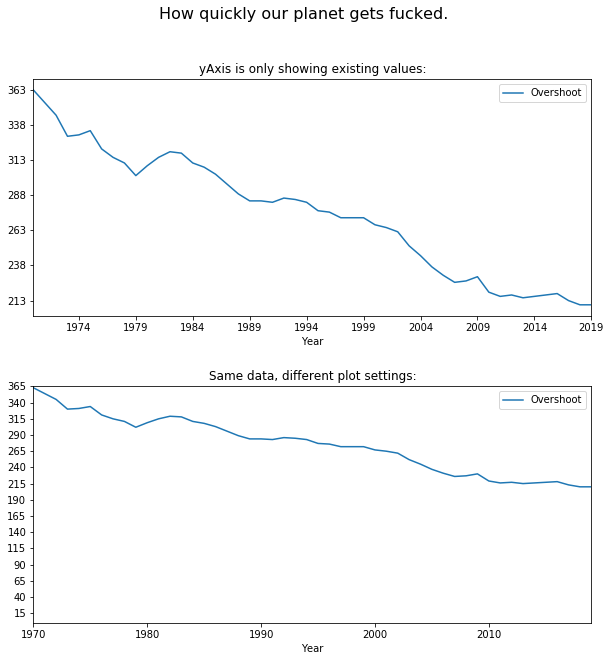

In [124]:
# Nice one. Now we what number (out of 365 days a year) day every year
# the Overshoot Day happened.

# Now we're going to plot this data in a very simple linechart, using a figure
# with two subplots that will have different plotting settings:

# Some settings for plotting
# (w = width, h = height, d = dpi, s = space)
w = 10
h = 10
d = 72
s = 0.3

# Initialising the figure, setting width, height and dots per inch
fig = plt.figure(figsize=(w, h), dpi=d)

# Adding figure title
fig.suptitle('How quickly our planet gets fucked.', fontsize=16)

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)
# Set title for first plot
ax1.set_title("yAxis is only showing existing values:")

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)
# Set title for second plot
ax2.set_title("Same data, different plot settings:")

# About the axis ticks...

# We want the ticks of the xAxis on the plot we'll create to definitely
# show the current year. This is df2['Year'].max() – and then go back in 
# steps of 5 years, until minimum year, which is df2['Year'].min()

# The np.arange(start,end,steps).toList() function does that for us and
# creates a new list with all the years:
xTicks = np.arange(df2['Year'].max(), df2['Year'].min(), -5).tolist()

# Print xTicks as they are. As we see, they are, of course, the wrong way round now:
print xTicks

# Calculating ticks for 2019 (last entry in the dataframe) until 1970,
# in steps of 25 years:
yTicks1 = np.arange(df2['Overshoot'].max(), df2['Overshoot'].min(), -25).tolist()

# For the second plot we simply put ticks every 25 years, starting at 365
yTicks2 = np.arange(365, 0, -25).tolist()

# ...and also print yTicks
print yTicks

df2.plot(
    ax=ax1,
    x ='Year',
    y='Overshoot',
    kind = 'line',
    xticks=xTicks,
    yticks=yTicks1
)

df2.plot(
    ax=ax2,
    x ='Year',
    y='Overshoot',
    kind = 'line',
    ylim=[0,365],
    yticks=yTicks2
)


# More space between subplots
fig.subplots_adjust(hspace=s)

In [125]:
# Good work! Now, for the final step, we save this as PDF and PNG to our
# local folder. Like this:

# Saving to PNG and PDF
fig.savefig('shootout.pdf')
fig.savefig('shootout.png')

# Thanks for reading! That was my very first, small Python tutorial. Get in touch via https://www.marcfehr.com if you want me to do another one – best to also come up with an idea! :)